# IoT전자공학과 강준구 입니다.

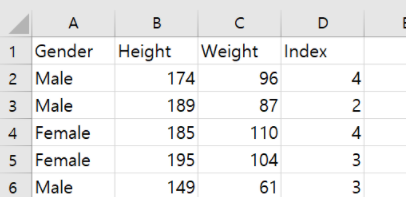

500명의 서로다른 성별과 키, 몸무게 그리고 건강등급입니다.   
이러한 데이터를 활용하여 BMI를 계산하고 그에따른 분포도를 시각화해 의미를 도출합니다.   
## 최종 목표 
1. 키와 몸무게 분포도
2. BMI 지수와 건강등급이 과연 성별과 관련이 있을까? 
3. 인공지능은 어떻게 볼까?

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
import matplotlib.font_manager as fm
font_path = r'C:\Windows\Fonts\batang.ttc'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [9]:
df=pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [10]:
df.columns=['Gender','Height','Weight','Health']
df.head()

,Gender,Height,Weight,Health
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


null값이 있는지도 확인해야겠죠? 다행이 없네요

In [11]:
df.isna().sum()

Gender    0
Height    0
Weight    0
Health    0
dtype: int64

In [12]:
df.memory_usage(deep=True)

Index       128
Gender    31010
Height     4000
Weight     4000
Health     4000
dtype: int64

이제 메모리를 확인해보죠. 현재 15.8KB가 넘습니다.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Health  500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


Gender는 굳이 Object일 필요가 없으니 category로, 키와 몸무게가 255가 넘을일은 없겠죠? uint8로 바꾸어줍니다.

In [14]:
df['Gender']=df['Gender'].astype('category')
df['Height']=df['Height'].astype(np.uint8)
df['Weight']=df['Weight'].astype(np.uint8)
df['Health']=df['Health'].astype(np.uint8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  500 non-null    category
 1   Height  500 non-null    uint8   
 2   Weight  500 non-null    uint8   
 3   Health  500 non-null    uint8   
dtypes: category(1), uint8(3)
memory usage: 2.2 KB


총 데이터가 13%로 감소하였습니다

In [16]:
print(2200/15800)

0.13924050632911392


이제 본격적으로 분석을 시작하겠습니다. 먼저 전체 키와 몸무게의 히스토그램을 통해 분포를 보겠습니다.

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '키 히스토그램')

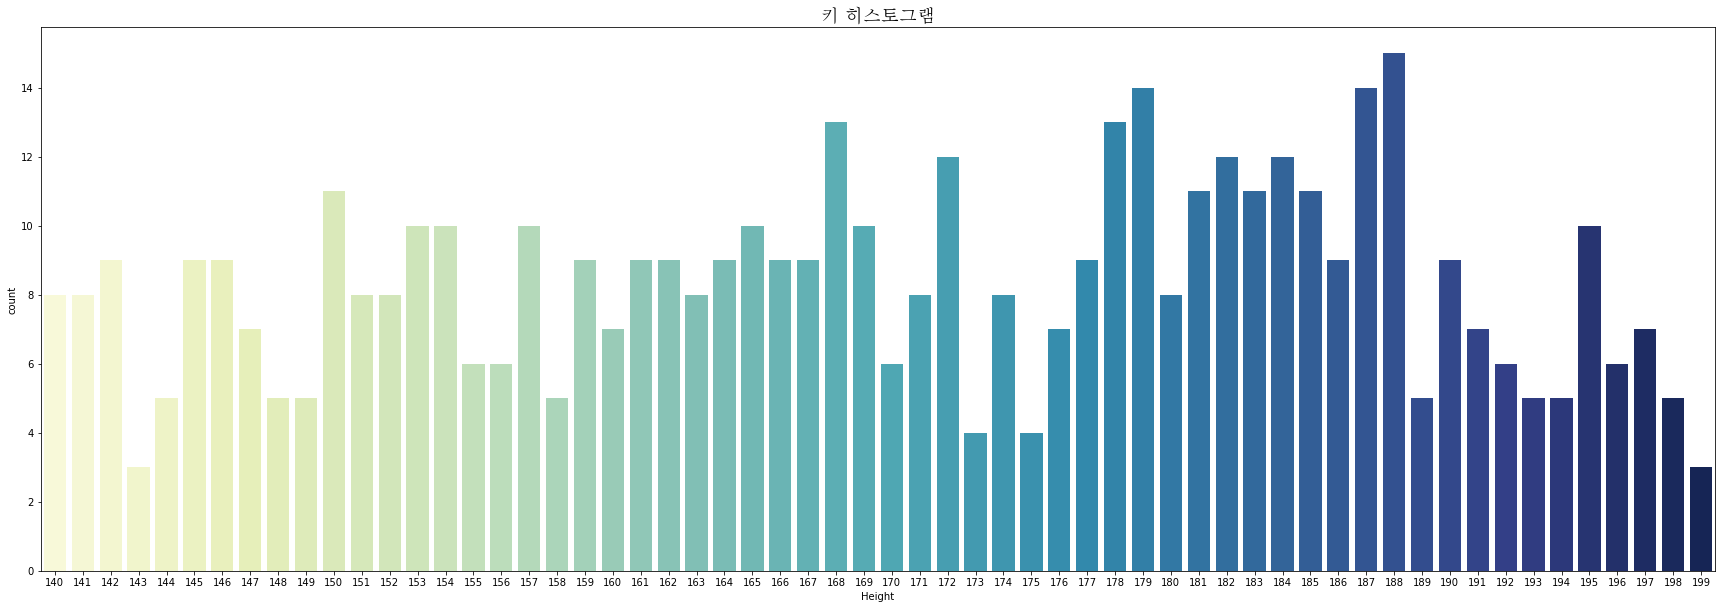

In [17]:
plt.rcParams['figure.figsize'] = (30, 10)
sns.countplot(df['Height'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("키 히스토그램",fontproperties=fontprop)

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '몸무게 히스토그램')

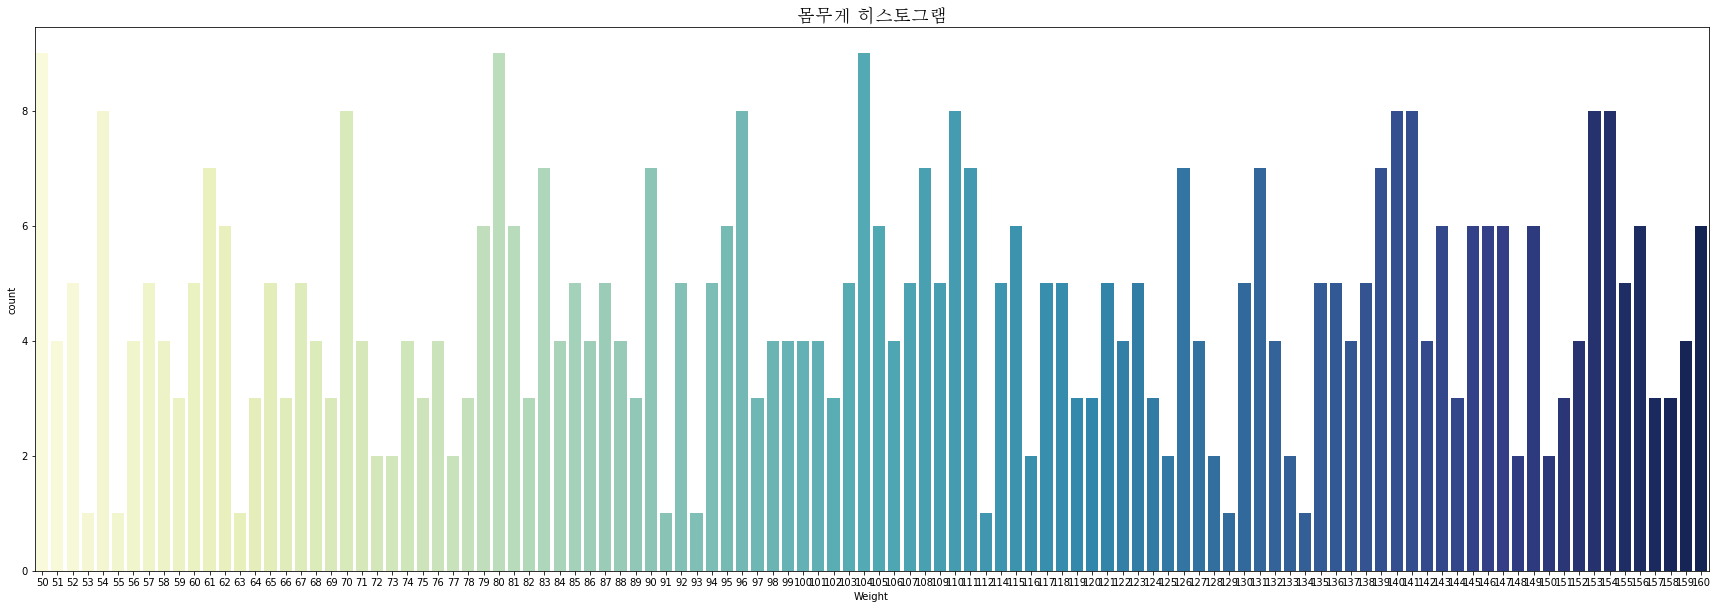

In [18]:
plt.rcParams['figure.figsize'] = (30, 10)
sns.countplot(df['Weight'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("몸무게 히스토그램",fontproperties=fontprop)

다음은 키와  몸무게 히스토그램입니다.   
오른쪽으로 갈수록 큰키와 높은 몸무게 인데요 언뜻 보면 골고루 분포되어있는것같습니다.  
하지만 실제 건강등급은 다릅니다. 

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '건강등급 히스토그램')

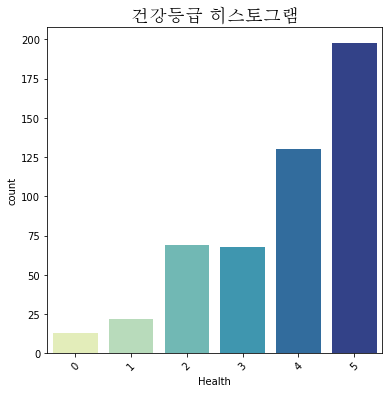

In [19]:
plt.rcParams['figure.figsize'] = (6, 6)
sns.countplot(df['Health'], palette='YlGnBu')
plt.xticks(rotation=45)
ax = plt.gca()
ax.set_title("건강등급 히스토그램",fontproperties=fontprop)

숫자가 높아질수록 비만입니다. 극도의 비만이 가장 많이 있음을 볼 수 있습니다.

도대체 어떻게 분포가 되어있는지 보겠습니다. 네,, 생략하고 바로 시각화해보죠

In [20]:
df.describe()

,Height,Weight,Health
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


몸무게는 100K대에 많이 몰려있고, 키는 180정도에 몰려있음을 알 수 있습니다.

<AxesSubplot:xlabel='Weight', ylabel='Density'>

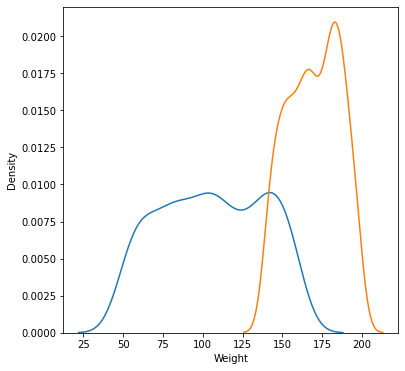

In [21]:
sns.kdeplot(df.Weight)
sns.kdeplot(df.Height)

## 이것을 한눈에 보면 다음과 같습니다.
몸무게가 증가할수록 건강등급은 높아지고(비만이 되고) 키가 줄어들수록 역시 건강등급이 높아집니다.

C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rkdwn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


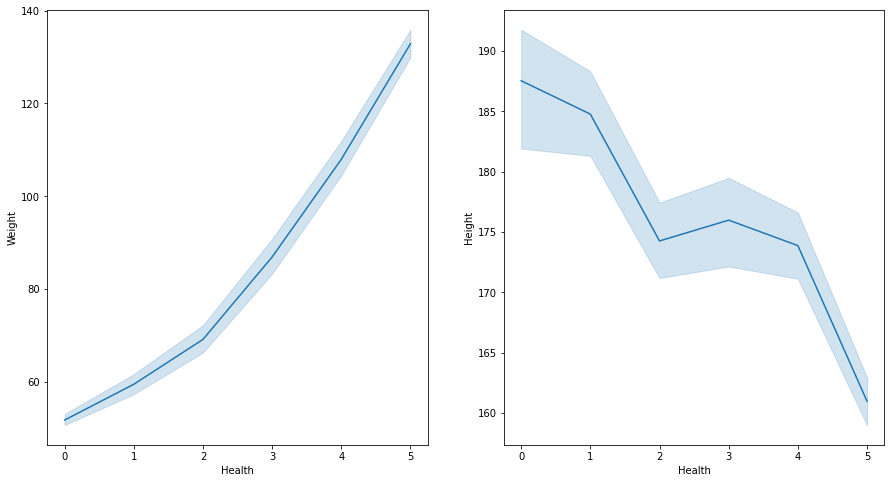

In [52]:
fig, ax= plt.subplots(1,2, figsize=(15,8))
sns.lineplot(df['Health'],df['Weight'], ax=ax[0])
sns.lineplot(df['Health'],df['Height'], ax=ax[1])
plt.show()

건강등급을 0~5로 나누는건 가독성이 떨어집니다. 그러니 문자열로 바꾸어보겠습니다

In [23]:
def healthy(x):
    if(x==0):
        return "Extremely Weak"
    elif(x==1):
        return "Weak"
    elif(x==2):
        return "Normal"
    elif(x==3):
        return "OverWeight"
    elif(x==4):
        return "Obesity"
    else:
        return "Extreme Obesity"
    
    
df["Health"]=df['Health'].apply(healthy)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Obesity'),
  Text(1, 0, 'Normal'),
  Text(2, 0, 'OverWeight'),
  Text(3, 0, 'Extreme Obesity'),
  Text(4, 0, 'Weak'),
  Text(5, 0, 'Extremely Weak')])

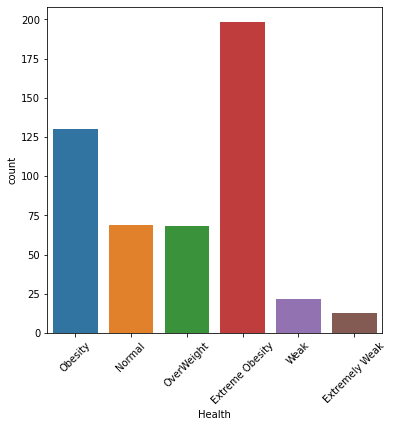

In [24]:
sns.countplot(x="Health",data=df)
plt.xticks(rotation=45)

하지만 이렇게 보는것보다 성별에 따라 나누어서 보는게 좋을 것 같습니다.

극도로 비만엔 여성이 더 많고 정상 체중인 Normal은 남성이 더 많음을 알 수 있습니다.

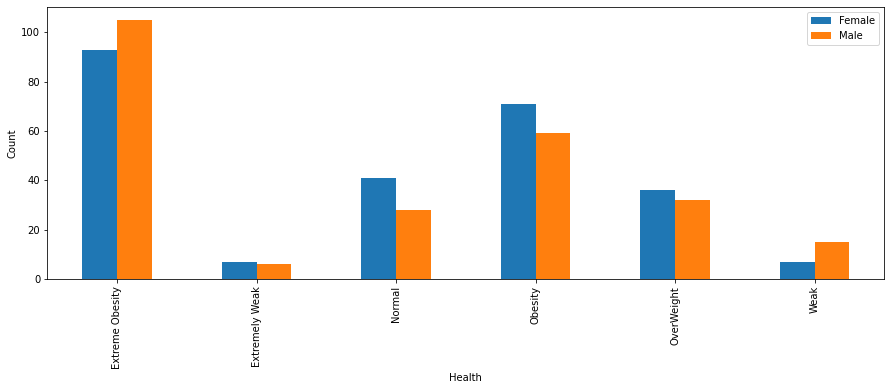

In [25]:
tab = pd.crosstab(index=df['Health'], columns=df['Gender'])
tab.plot(kind="bar", stacked=False, figsize=(15,5))
plt.xlabel('Health')
plt.ylabel('Count')
plt.legend()
plt.show()

어디에 몰려있는지 더 구체적으로 보죠! 초고도비만은 몸무게가 140Kg에 많이 볼려있습니다.키는 어떨까요?

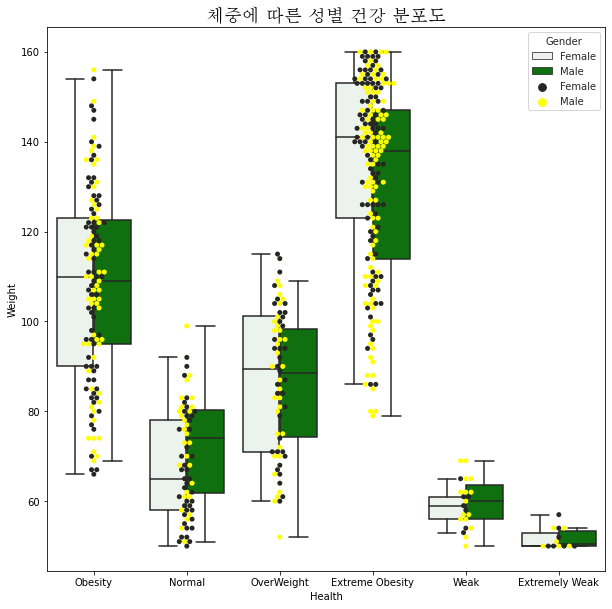

In [26]:
fig,ax = plt.subplots(figsize=(10, 10))
with sns.axes_style("white"):
    sns.boxplot(data=df,x='Health',y='Weight',hue='Gender',color="Green")
    sns.swarmplot(data=df,x='Health',y='Weight',hue='Gender',color="Yellow")
    plt.title("체중에 따른 성별 건강 분포도",fontproperties=fontprop)
    plt.plot()

키의 경우 160cm정도에서 고도비만이 많이 몰려있음을 알 수 있습니다.

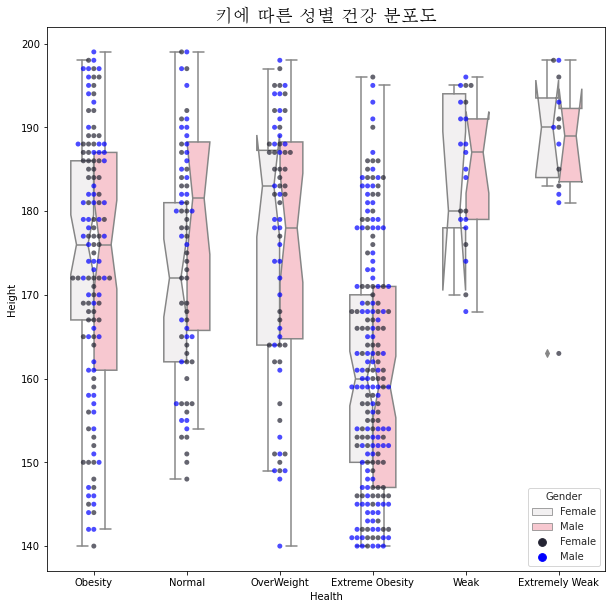

In [27]:
fig,ax = plt.subplots(figsize=(10, 10))
with sns.axes_style("white"):
    sns.boxplot(data=df,x='Health',y='Height',hue='Gender',color="Pink",notch=True,width=.5)
    sns.swarmplot(data=df,x='Health',y='Height',hue='Gender',color="Blue",alpha=.7)
    plt.title("키에 따른 성별 건강 분포도",fontproperties=fontprop)
    plt.plot()

그럼 이제 단순히 키와 몸무게로만 보지말고 BMI로 보겠습니다.  
BMI를 통해서 비만 여부를 가늠할 수 있습니다.

In [28]:
df["BMI"]=df['Weight']/(df['Height']/100)**2

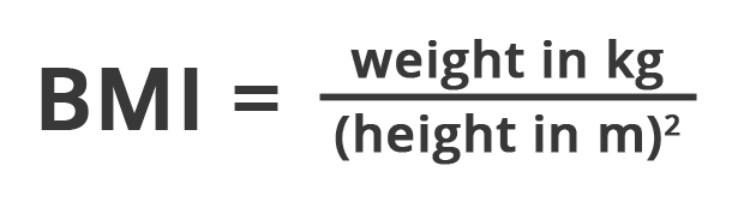

BMI 지수가 높을수록 초고도 비만에 가깝습니다.

In [29]:
df.head()

,Gender,Height,Weight,Health,BMI
0,Male,174,96,Obesity,31.708284
1,Male,189,87,Normal,24.355421
2,Female,185,110,Obesity,32.140248
3,Female,195,104,OverWeight,27.350427
4,Male,149,61,OverWeight,27.476240


초고도비만(빨간색)이 정말 많이 분포하는군요

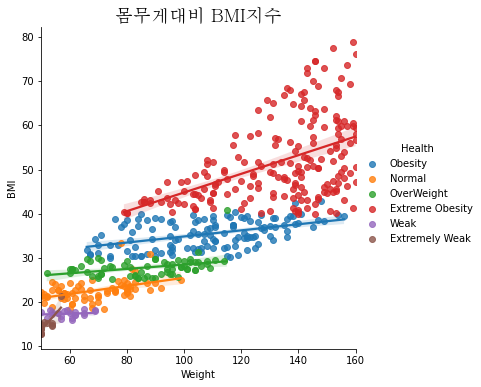

In [30]:
sns.lmplot(data=df,x="Weight",y="BMI",fit_reg=True,hue="Health") 
plt.title("몸무게대비 BMI지수",fontproperties=fontprop)
plt.show()

다시 성별에 따라 나누어 보겠습니다. 흰색이 여성, 빨간색이 남성 입니다.  거의 비슷한거 같기도..하네요.

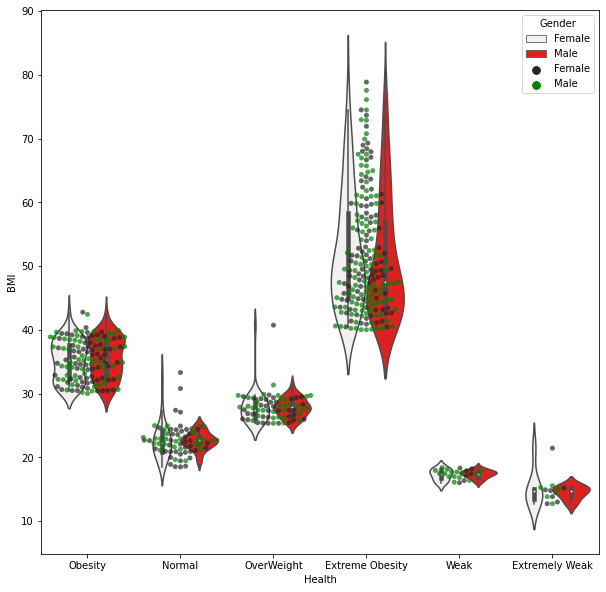

In [31]:
fig=plt.subplots(figsize=(10,10))
sns.violinplot(data=df,y="BMI",x="Health",hue="Gender",color="Red")
sns.swarmplot(data=df,x='Health',y='BMI',hue='Gender',color="Green",alpha=.7) #투명도
plt.show()

아래는키와 몸무무게 상관관계입니다.  

초록색이 여성 보라색이 남성입니다. 대체로 골고루 분포되어 있습니다.
    
따라서 성별이 BMI 값에 큰 영향을 미치지 않는거 같습니다.

Text(0.5, 1.0, '성별에 따른 키,몸무게 분포도')

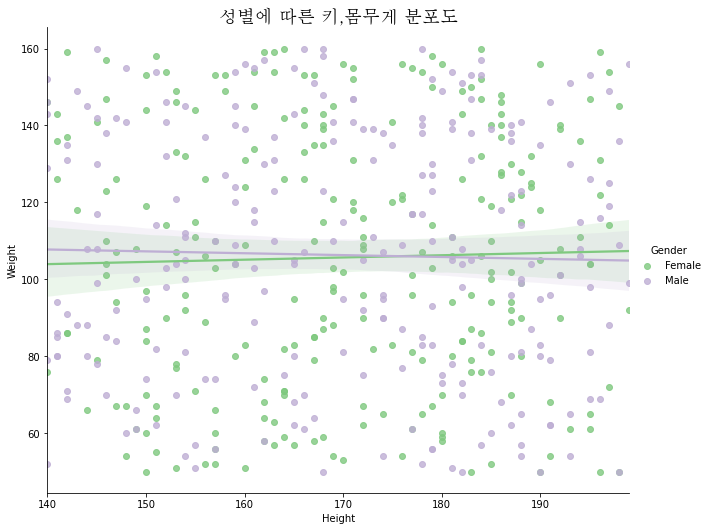

In [32]:
# Trend in Gender based on relationship between Height and Weight
sns.lmplot(x='Height', y='Weight', hue='Gender', data=df,
           fit_reg=True, height=7, aspect=1.25, palette = "Accent")
ax = plt.gca()
ax.set_title("성별에 따른 키,몸무게 분포도",fontproperties=fontprop)

그래도 정확하게 봐야하니 남성과 여성을 나눠서 수치로 확인해 보겠습니다.

In [33]:
male_data = df[df['Gender']=='Male']
female_data = df[df['Gender']=='Female']

<AxesSubplot:>

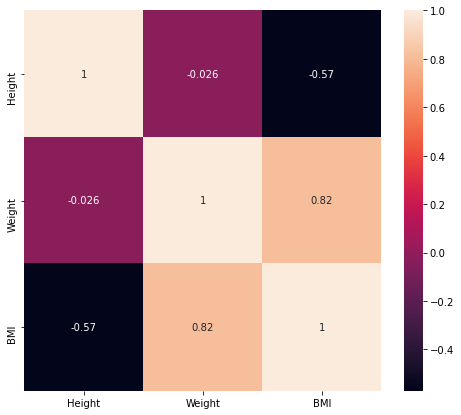

In [34]:
plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(male_data.corr(), annot=True)

<AxesSubplot:>

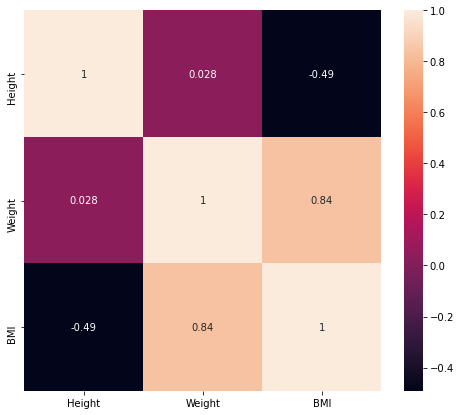

In [35]:
plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(female_data.corr(), annot=True)

수치로 봐도 거의 똑같습니다. 제가 내린 결론은 BMI지수와 성별간의 상관관계는 별로 없다.

여기까진 제가 도출한 데이터 분석이죠. 그렇다면 인공지능은 어떻게 생각할까요?

이걸로 딥러닝모델 한번 만들어 보겠습니다. 키 몸무게 건강 등급만을가지고 한번 남성일지 여성일지 맞춰보는 것입니다.

그럴려면 약간의 데이터 가공이 필요한데요 남자는 1, 여자는 0, 그리고 Health는 초기의 0~5로 되돌려 놓겠습니다.

In [36]:
df["Gender"] = df["Gender"].astype('category')
df["Gender"] = df["Gender"].cat.codes
df.head()

,Gender,Height,Weight,Health,BMI
0,1,174,96,Obesity,31.708284
1,1,189,87,Normal,24.355421
2,0,185,110,Obesity,32.140248
3,0,195,104,OverWeight,27.350427
4,1,149,61,OverWeight,27.476240


In [37]:
def healthy(x):
    if(x=="Extremely Weak"):
        return 0
    elif(x=="Weak"):
        return 1
    elif(x=="Normal"):
        return 2
    elif(x=="OverWeight"):
        return 3
    elif(x=="Obesity"):
        return 4
    else:
        return 5
    
    
df["Health"]=df['Health'].apply(healthy)

In [38]:
df.head()

,Gender,Height,Weight,Health,BMI
0,1,174,96,4,31.708284
1,1,189,87,2,24.355421
2,0,185,110,4,32.140248
3,0,195,104,3,27.350427
4,1,149,61,3,27.476240


다시 BMI는 삭제해줍니다.

In [39]:
df=df.drop(columns='BMI')


In [40]:
df.head()

,Gender,Height,Weight,Health
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [41]:
import tensorflow as tf

y 데이터에 성별

In [42]:
yData=df['Gender'].values 
print(yData)

[1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1
 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1
 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1
 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 

x 데이터에 키, 몸무게, 건강등급

In [43]:
xData=[]
for i,rows in df.iterrows():
    xData.append([rows['Height'],rows['Weight'],rows['Health']])

여기서 Sequential을 쓰면 신경망 레이어들을 쉽게 만들 수 있죠

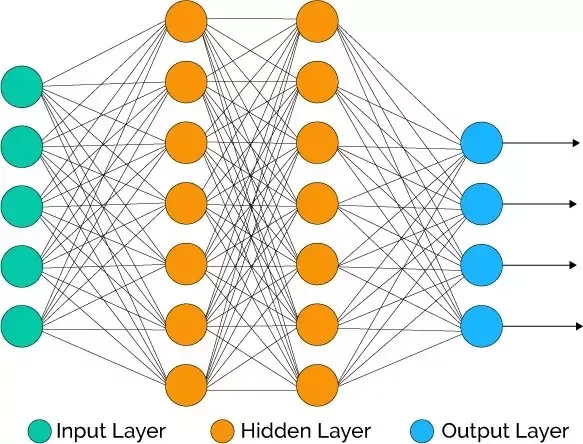

각각의 레이어의 64와 128, 활성함수는 tanh를 넣어주고요 마지막 노드에는 활성함수로 시그모이드를 넣어줍니다.   
컴파일 할땐 옵티마이저에 아담을, 로스에는 바이너리 크로스 앤트로피, 메트릭스에는 어큐리시를 넣어줍니다. 
x엔 학습데이터를 y엔 정답을 넣어주고 에폭은 2000번을 넣어줍니다.

In [48]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation='tanh'),
    tf.keras.layers.Dense(128,activation='tanh'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(np.array(xData),np.array(yData),epochs=2000)

Epoch 1/2000
16/16 [==============================] - 0s 867us/step - loss: 0.7214 - accuracy: 0.4879
Epoch 2/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.7018 - accuracy: 0.4670
Epoch 3/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.7297 - accuracy: 0.4635
Epoch 4/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.7119 - accuracy: 0.5056
Epoch 5/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.7000 - accuracy: 0.5184
Epoch 6/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5380
Epoch 7/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5107
Epoch 8/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.5169
Epoch 9/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6999 - accuracy: 0.5143
Epoch 10/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.52

16/16 [==============================] - 0s 800us/step - loss: 0.6888 - accuracy: 0.5199
Epoch 161/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6861 - accuracy: 0.5542
Epoch 162/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5348
Epoch 163/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5554
Epoch 164/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5284
Epoch 165/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6883 - accuracy: 0.5208
Epoch 166/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5135
Epoch 167/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6978 - accuracy: 0.5021
Epoch 168/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5210
Epoch 169/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6905 - accura

16/16 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5444
Epoch 319/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6807 - accuracy: 0.5926
Epoch 320/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6835 - accuracy: 0.5436
Epoch 321/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6926 - accuracy: 0.5420
Epoch 322/2000
16/16 [==============================] - 0s 800us/step - loss: 0.6782 - accuracy: 0.5715
Epoch 323/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5415
Epoch 324/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6835 - accuracy: 0.5681
Epoch 325/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5523
Epoch 326/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5419
Epoch 327/2000
16/16 [==============================] - 0s 800us/step - loss: 0.6845 - ac

16/16 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5397
Epoch 398/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6827 - accuracy: 0.5589
Epoch 399/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5410
Epoch 400/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6831 - accuracy: 0.5188
Epoch 401/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5877
Epoch 402/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6870 - accuracy: 0.5279
Epoch 403/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6894 - accuracy: 0.5001
Epoch 404/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5561
Epoch 405/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6865 - accuracy: 0.5354
Epoch 406/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6902 - 

16/16 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5401
Epoch 556/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.5534
Epoch 557/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5443
Epoch 558/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6784 - accuracy: 0.5518
Epoch 559/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.5737
Epoch 560/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5563
Epoch 561/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6863 - accuracy: 0.5484
Epoch 562/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5553
Epoch 563/2000
16/16 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5307
Epoch 564/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy

16/16 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.5912
Epoch 714/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6817 - accuracy: 0.5689
Epoch 715/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5534
Epoch 716/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6831 - accuracy: 0.5450
Epoch 717/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.6031
Epoch 718/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5602
Epoch 719/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6840 - accuracy: 0.5724
Epoch 720/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6837 - accuracy: 0.5171
Epoch 721/2000
16/16 [==============================] - 0s 734us/step - loss: 0.6857 - accuracy: 0.5369
Epoch 722/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6817 - ac

16/16 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5484
Epoch 872/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6740 - accuracy: 0.5687
Epoch 873/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6843 - accuracy: 0.5766
Epoch 874/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6736 - accuracy: 0.5746
Epoch 875/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5272
Epoch 876/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.5481
Epoch 877/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.5420
Epoch 878/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.5475
Epoch 879/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.5266
Epoch 880/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6793 - accura

Epoch 1029/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5646
Epoch 1030/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6822 - accuracy: 0.5625
Epoch 1031/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.5580
Epoch 1032/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6785 - accuracy: 0.5239
Epoch 1033/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6767 - accuracy: 0.5536
Epoch 1034/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5437
Epoch 1035/2000
16/16 [==============================] - 0s 800us/step - loss: 0.6763 - accuracy: 0.5343
Epoch 1036/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6755 - accuracy: 0.5598
Epoch 1037/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6835 - accuracy: 0.5154
Epoch 1038/2000
16/16 [==============================] - 0s 867

16/16 [==============================] - 0s 867us/step - loss: 0.6767 - accuracy: 0.5622
Epoch 1186/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.5713
Epoch 1187/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6701 - accuracy: 0.5612
Epoch 1188/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5833
Epoch 1189/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.5470
Epoch 1190/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6711 - accuracy: 0.5697
Epoch 1191/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6851 - accuracy: 0.5454
Epoch 1192/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.5382
Epoch 1193/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5663
Epoch 1194/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6792

16/16 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.5957
Epoch 1265/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5507
Epoch 1266/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6855 - accuracy: 0.5502
Epoch 1267/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5615
Epoch 1268/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6731 - accuracy: 0.5980
Epoch 1269/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6737 - accuracy: 0.5323
Epoch 1270/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.5745
Epoch 1271/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5219
Epoch 1272/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.5517
Epoch 1273/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6693 - acc

16/16 [==============================] - 0s 1ms/step - loss: 0.6751 - accuracy: 0.5828
Epoch 1423/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5209
Epoch 1424/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.5453
Epoch 1425/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.5657
Epoch 1426/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5637
Epoch 1427/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.4999
Epoch 1428/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6678 - accuracy: 0.6164
Epoch 1429/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.5677
Epoch 1430/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.5771
Epoch 1431/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6775 -

16/16 [==============================] - 0s 933us/step - loss: 0.6650 - accuracy: 0.5736
Epoch 1581/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.5818
Epoch 1582/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5571
Epoch 1583/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5255
Epoch 1584/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6720 - accuracy: 0.5539
Epoch 1585/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6720 - accuracy: 0.5612
Epoch 1586/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5606
Epoch 1587/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.5841
Epoch 1588/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6724 - accuracy: 0.5374
Epoch 1589/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6829 -

16/16 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5425
Epoch 1660/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6654 - accuracy: 0.5498
Epoch 1661/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.5564
Epoch 1662/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.5449
Epoch 1663/2000
16/16 [==============================] - 0s 934us/step - loss: 0.6783 - accuracy: 0.5363
Epoch 1664/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5666
Epoch 1665/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.5557
Epoch 1666/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.5692
Epoch 1667/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.5574
Epoch 1668/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6832 - a

16/16 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5391
Epoch 1818/2000
16/16 [==============================] - 0s 933us/step - loss: 0.6729 - accuracy: 0.5447
Epoch 1819/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6649 - accuracy: 0.5408
Epoch 1820/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5287
Epoch 1821/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.5559
Epoch 1822/2000
16/16 [==============================] - 0s 867us/step - loss: 0.6808 - accuracy: 0.5628
Epoch 1823/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6810 - accuracy: 0.5712
Epoch 1824/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.5611
Epoch 1825/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.5009
Epoch 1826/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6697 -

16/16 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5795
Epoch 1975/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.5566
Epoch 1976/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6598 - accuracy: 0.5834
Epoch 1977/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.5295
Epoch 1978/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.5940
Epoch 1979/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5671
Epoch 1980/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.5403
Epoch 1981/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6673 - accuracy: 0.5344
Epoch 1982/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.5618
Epoch 1983/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.6661 - acc

In [53]:
predict =model.predict([[175,70,2]])
print(predict)

[[0.6264169]]
